In [37]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
df = pd.read_csv('https://raw.githubusercontent.com/cl65610/west_nile/master/assets/spray.csv')

In [5]:
df.head()

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


In [6]:
df['Date'] = pd.to_datetime(df["Date"])
df.set_index(['Date'], inplace=True)

In [7]:
df.head()

,Time,Latitude,Longitude
Date,,,
2011-08-29,6:56:58 PM,42.391623,-88.089163
2011-08-29,6:57:08 PM,42.391348,-88.089163
2011-08-29,6:57:18 PM,42.391022,-88.089157
2011-08-29,6:57:28 PM,42.390637,-88.089158
2011-08-29,6:57:38 PM,42.390410,-88.088858


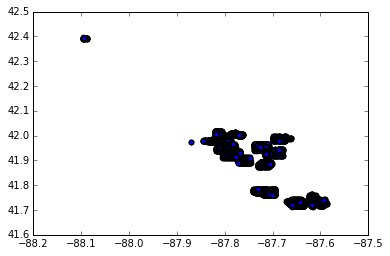

In [26]:
X = df[['Longitude', 'Latitude']]
plt.scatter(df['Longitude'], df['Latitude'])

In [100]:
dbscn = DBSCAN(eps = .0045, min_samples = 50).fit(X)  
labels = dbscn.labels_

In [101]:
set(labels)

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13}

In [96]:
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

Silhouette Coefficient: 0.413


In [102]:
labels_df = pd.DataFrame(labels.reshape(14835,1), columns = ['labels'])

In [103]:
merged_df = df.join(labels_df)
merged_df.head()

,Date,Time,Latitude,Longitude,labels
0,2011-08-29,6:56:58 PM,42.391623,-88.089163,0
1,2011-08-29,6:57:08 PM,42.391348,-88.089163,0
2,2011-08-29,6:57:18 PM,42.391022,-88.089157,0
3,2011-08-29,6:57:28 PM,42.390637,-88.089158,0
4,2011-08-29,6:57:38 PM,42.390410,-88.088858,0


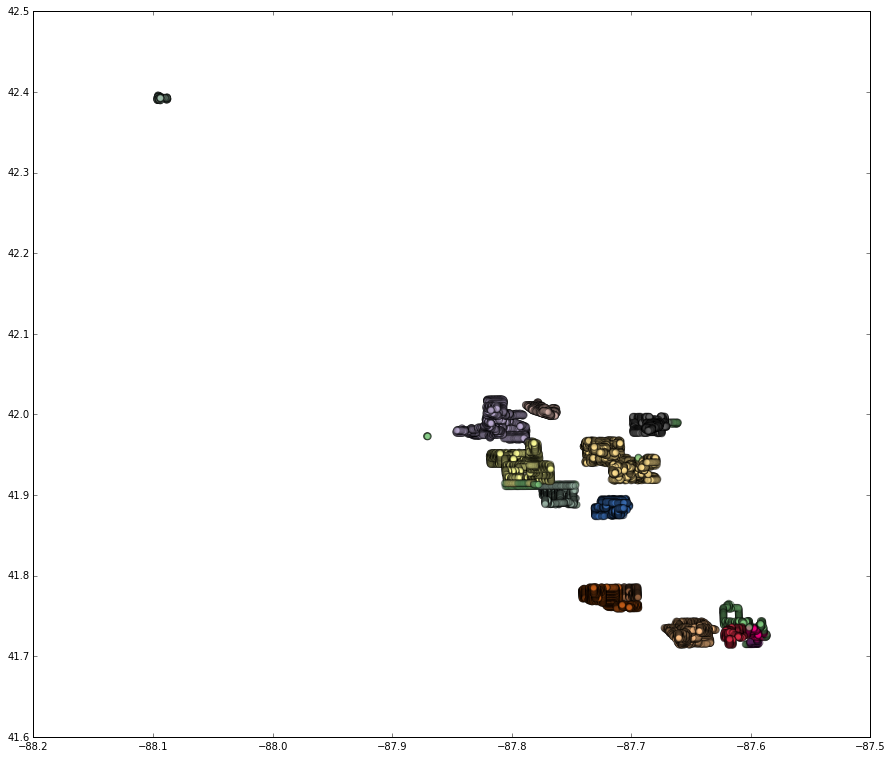

In [104]:

plt.figure(figsize=(15,13))
plt.scatter(merged_df.Longitude, merged_df.Latitude, c=merged_df['labels'], cmap='Accent', s=45, alpha=0.4, marker='o')
plt.show()